In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
from bokeh.plotting import figure, show

## Import data

These files show the number of MetroCard swipes made each week by customers entering each station of the New York City Subway, PATH, AirTrain JFK and the Roosevelt Island Tram, broken out to show the relative popularity of the various types of MetroCards. 

In [2]:
df=pd.read_csv("Data/Fare_Card_History_for_Metropolitan_Transportation_Authority__MTA___Beginning_2010.csv")
df.head()

,From Date,To Date,Remote Station ID,Station,Full Fare,Senior Citizen / Disabled,7 Day ADA Farecard Access System Unlimited,30 Day ADA Farecard Access System Unlimited,Joint Rail Road Ticket,7 Day Unlimited,...,LIB Special Senior,Rail Road Unlimited No Trade,Transit Check Metrocard Annual Metrocard,Mail and Ride Easy Pay Express,Mail and Ride Unlimited,Path 2 Trip,Airtran Full Fare,Airtran 30 Day,Airtran 10 Trip,Airtran Monthly
0,08/06/2021,07/31/2021,R001,WHITEHALL STREET,27946,1824,242,376,8,11958,...,539,162,0,717,0,0,0,327,0,0
1,08/06/2021,07/31/2021,R003,CYPRESS HILLS,1323,134,3,13,0,817,...,12,19,0,11,0,0,0,70,0,0
2,08/06/2021,07/31/2021,R004,75TH STREET & ELDERTS LANE,4241,321,15,43,0,2029,...,14,31,0,28,0,0,0,301,0,0
3,08/06/2021,07/31/2021,R005,85TH STREET & FOREST PKWAY,4418,389,29,30,1,1999,...,13,25,0,40,0,0,0,111,0,0
4,08/06/2021,07/31/2021,R006,WOODHAVEN BOULEVARD,4193,315,27,55,0,2946,...,36,14,0,25,0,0,0,148,0,0


In [3]:
df['From_Date']=df['From Date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))
df['To_Date']=df['To Date'].apply(lambda x:datetime.strptime(x,'%m/%d/%Y'))
df.head()

,From Date,To Date,Remote Station ID,Station,Full Fare,Senior Citizen / Disabled,7 Day ADA Farecard Access System Unlimited,30 Day ADA Farecard Access System Unlimited,Joint Rail Road Ticket,7 Day Unlimited,...,Transit Check Metrocard Annual Metrocard,Mail and Ride Easy Pay Express,Mail and Ride Unlimited,Path 2 Trip,Airtran Full Fare,Airtran 30 Day,Airtran 10 Trip,Airtran Monthly,From_Date,To_Date
0,08/06/2021,07/31/2021,R001,WHITEHALL STREET,27946,1824,242,376,8,11958,...,0,717,0,0,0,327,0,0,2021-08-06,2021-07-31
1,08/06/2021,07/31/2021,R003,CYPRESS HILLS,1323,134,3,13,0,817,...,0,11,0,0,0,70,0,0,2021-08-06,2021-07-31
2,08/06/2021,07/31/2021,R004,75TH STREET & ELDERTS LANE,4241,321,15,43,0,2029,...,0,28,0,0,0,301,0,0,2021-08-06,2021-07-31
3,08/06/2021,07/31/2021,R005,85TH STREET & FOREST PKWAY,4418,389,29,30,1,1999,...,0,40,0,0,0,111,0,0,2021-08-06,2021-07-31
4,08/06/2021,07/31/2021,R006,WOODHAVEN BOULEVARD,4193,315,27,55,0,2946,...,0,25,0,0,0,148,0,0,2021-08-06,2021-07-31


In [4]:
df.info()
#['14 Day Reduced Fare Media Unlimited','1 Day Unlimited','14 Day Unlimited']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250874 entries, 0 to 250873
Data columns (total 28 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   From Date                                    250874 non-null  object        
 1   To Date                                      250874 non-null  object        
 2   Remote Station ID                            250874 non-null  object        
 3   Station                                      250874 non-null  object        
 4   Full Fare                                    250874 non-null  int64         
 5   Senior Citizen / Disabled                    250874 non-null  int64         
 6   7 Day ADA Farecard Access System Unlimited   250874 non-null  int64         
 7   30 Day ADA Farecard Access System Unlimited  250874 non-null  int64         
 8   Joint Rail Road Ticket                       250874 non-null  in

In [7]:
df[df['14 Day Reduced Fare Media Unlimited'].isnull()][['From Date','To Date','14 Day Reduced Fare Media Unlimited']]

,From Date,To Date,14 Day Reduced Fare Media Unlimited
1875,11/21/2020,11/27/2020,NaN
1876,11/21/2020,11/27/2020,NaN
1877,11/21/2020,11/27/2020,NaN
1878,11/21/2020,11/27/2020,NaN
1879,11/21/2020,11/27/2020,NaN
...,...,...,...
43153,03/30/2019,04/05/2019,NaN
43154,03/30/2019,04/05/2019,NaN
43155,03/30/2019,04/05/2019,NaN
43156,03/30/2019,04/05/2019,NaN


/var/folders/c3/wqq2zhw90l596jqv25j63ggc0000gn/T/ipykernel_61757/2756214409.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('From_Date').sum().plot()


<AxesSubplot:xlabel='From_Date'>

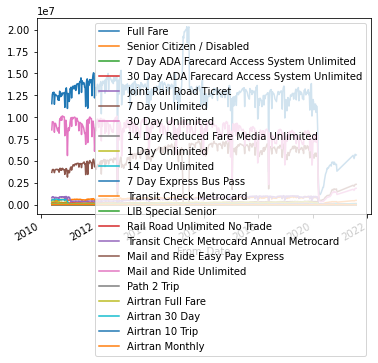

In [15]:
df.groupby('From_Date').sum().plot()

In [17]:
len(df['Remote Station ID'].unique())

525

## Visualizations with Bohek

In [6]:
p=figure(title="Time Series",
        x_axis_label='datetime',
        y_axis_label='Card Swipes')
p.line(df['From_Date'],df['Full Fare'])
# show(p)

Figure(id='1002', ...)